In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv")

In [4]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


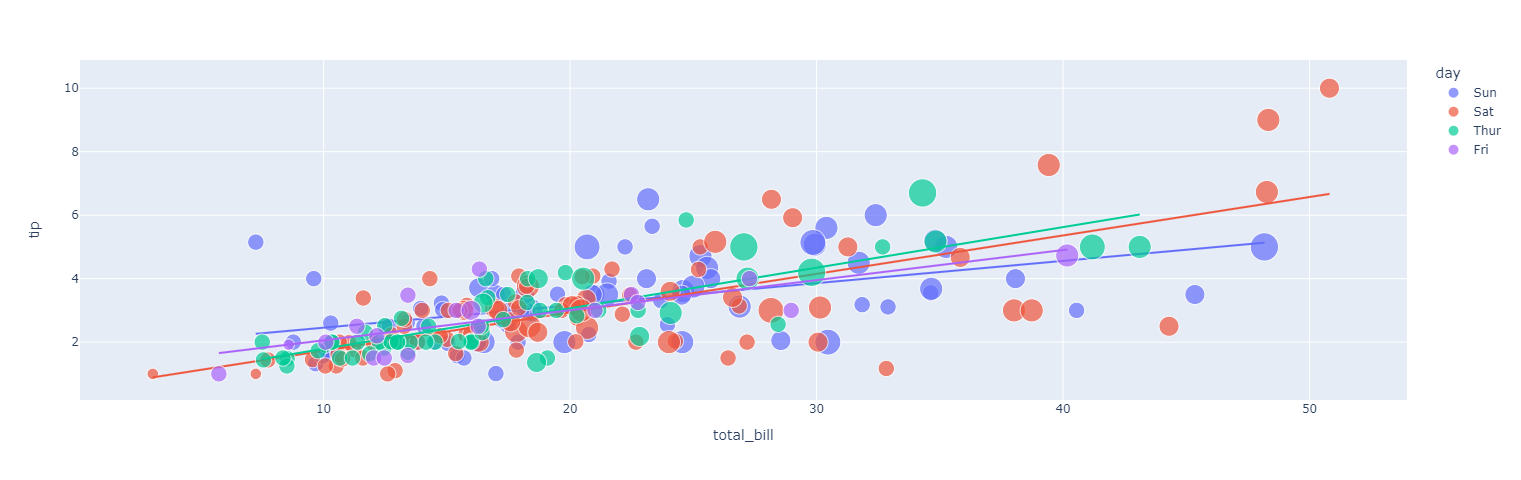

In [6]:
# Total bill - tip relation according to day of the week
figure = px.scatter(data_frame = data, x = "total_bill", y = "tip", size = "size", color = "day", trendline = "ols", width = 780, height = 480)
figure.show()

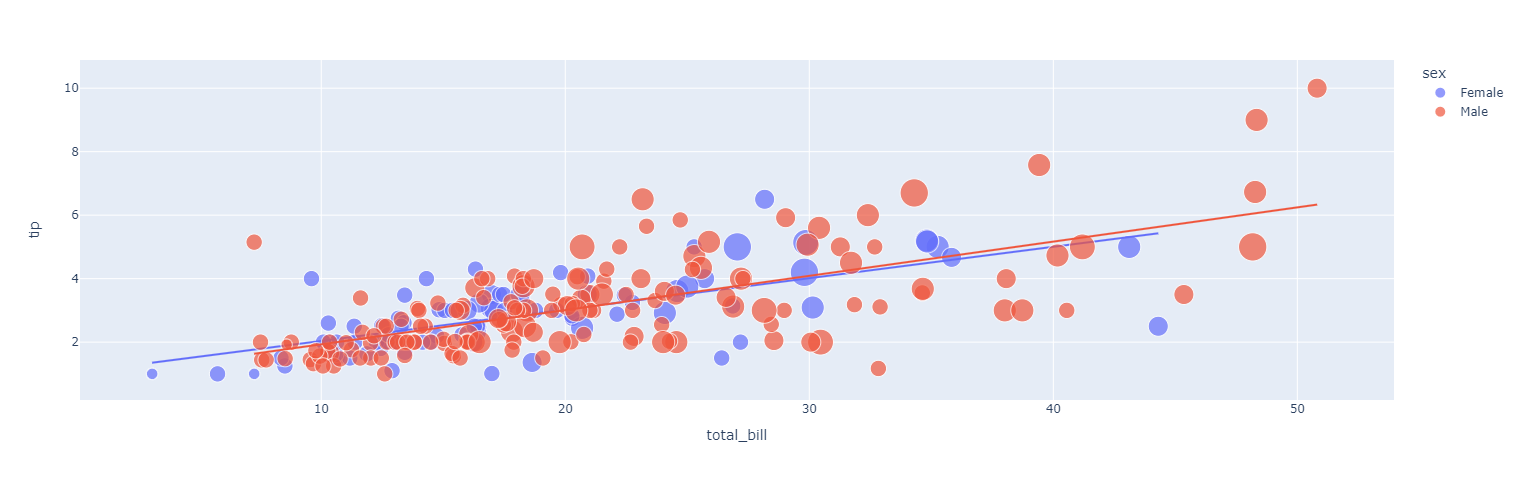

In [7]:
# Total bill - tip relation according to sex
figure = px.scatter(data_frame = data, x = "total_bill", y = "tip", size = "size", color = "sex", trendline = "ols", width = 780, height = 480)
figure.show()

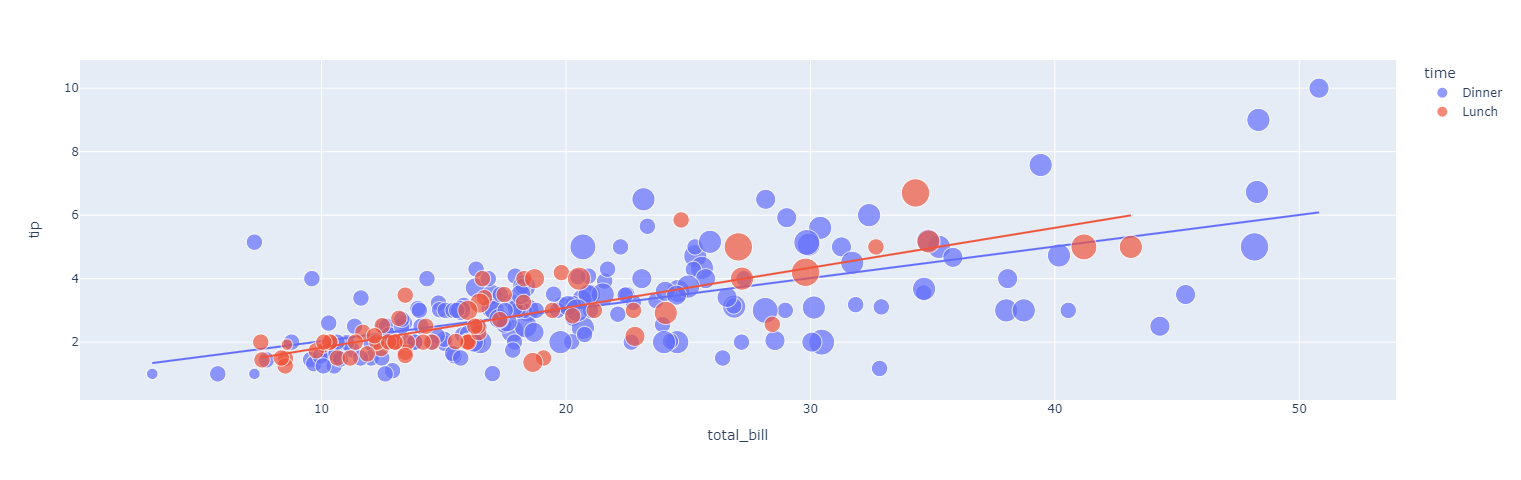

In [8]:
# Total bill - tip relation according to time of the meal
figure = px.scatter(data_frame = data, x = "total_bill", y = "tip", size = "size", color = "time", trendline = "ols", width = 780, height = 480)
figure.show()

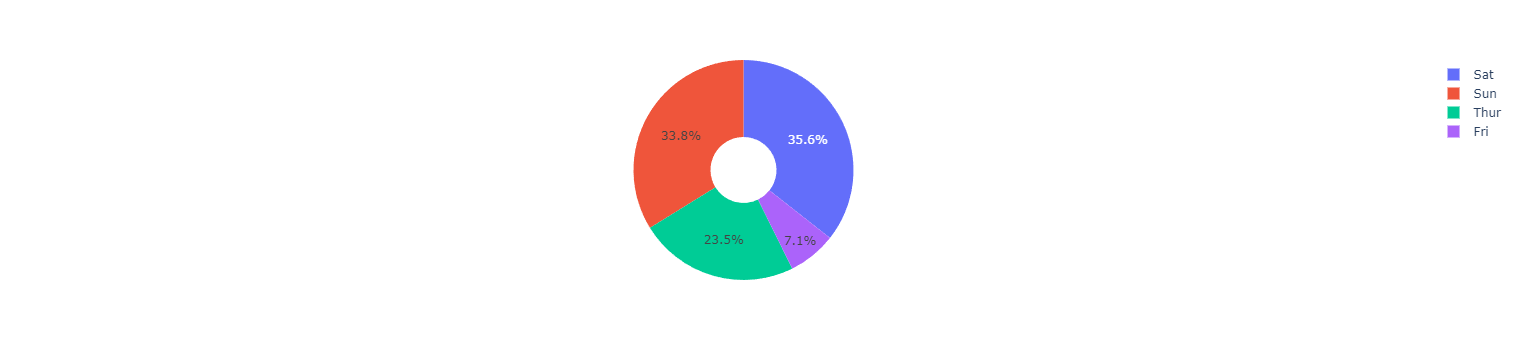

In [13]:
figure = px.pie(data, values = "tip", names = "day", hole = 0.3)
figure.show()

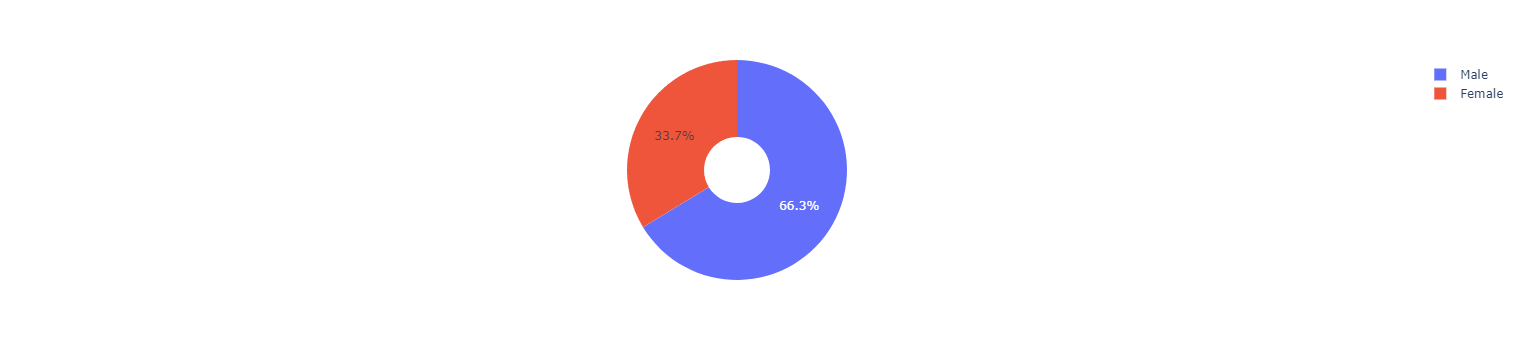

In [14]:
figure = px.pie(data, values = "tip", names = "sex", hole = 0.3)
figure.show()

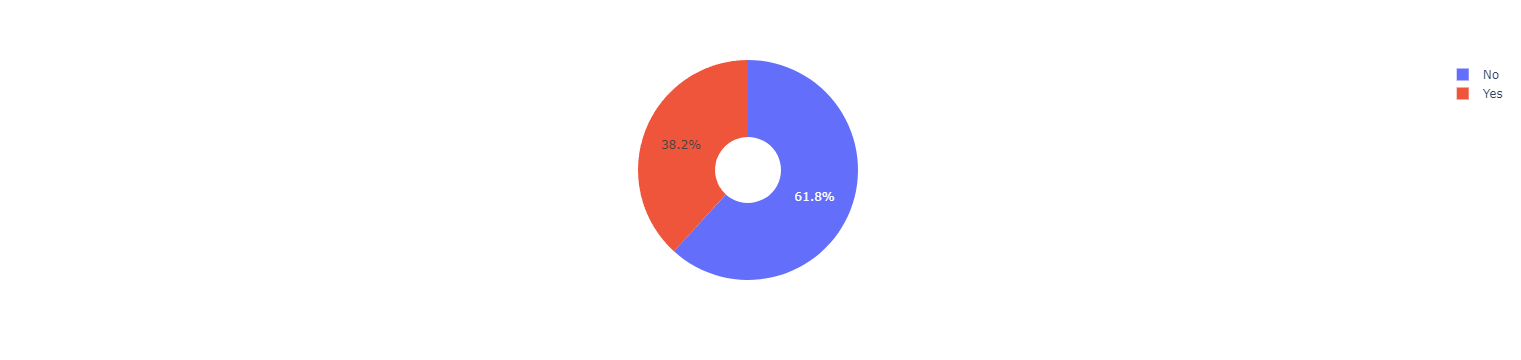

In [15]:
figure = px.pie(data, values = "tip", names = "smoker", hole = 0.3)
figure.show()

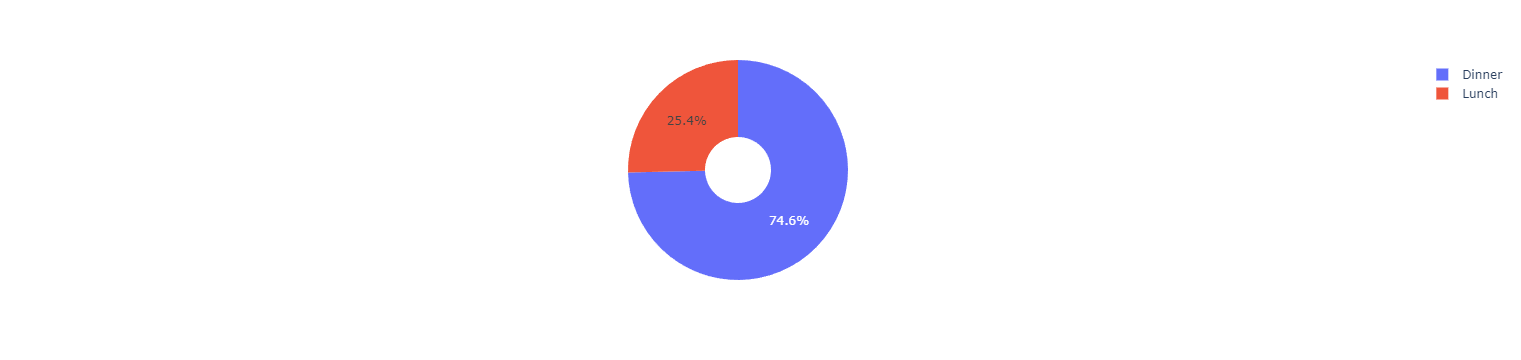

In [16]:
figure = px.pie(data, values = "tip", names = "time", hole = 0.3)
figure.show()

In [17]:
data["sex"] = data["sex"].map({"Female":0, "Male":1})
data["smoker"] = data["smoker"].map({"No":0, "Yes":1})
data["day"] = data["day"].map({"Thur":0, "Fri":1, "Sat":2, "Sun":3})
data["time"] = data["time"].map({"Lunch":0, "Dinner":1})

In [18]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


In [28]:
x = np.array(data.drop(["tip"], axis = 1))
y = np.array(data["tip"])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
model.predict(np.array([[25, 1, 0, 0, 1, 4]]))

array([3.78464634])